In [2]:
! pip install PyVISA-1.9.1-py3-none-any.whl

In [4]:
import visa

In [7]:
rm = visa.ResourceManager()
rm

<ResourceManager(<VisaLibrary('C:\\Windows\\system32\\visa32.dll')>)>

In [9]:
rm.list_resources()

('ASRL3::INSTR', 'GPIB0::5::INSTR')

In [10]:
resources = rm.list_resources()
resources

('ASRL3::INSTR', 'GPIB0::5::INSTR')

In [12]:
inst = rm.open_resource(resources[1])
inst

<'GPIBInstrument'('GPIB0::5::INSTR')>

In [13]:
inst.write("F2")

(4, <StatusCode.success: 0>)

In [14]:
inst.write("F1")

(4, <StatusCode.success: 0>)

In [22]:
inst.read()

'+000.536E-3\r\n'

In [27]:
y = []

for i in range(10):
    yi = float(inst.read())
    y.append(yi)
    
y

[0.000478,
 0.000511,
 0.000509,
 0.000525,
 0.000535,
 0.000539,
 0.000549,
 0.000551,
 0.000531,
 0.000524]

In [60]:
inst.close()

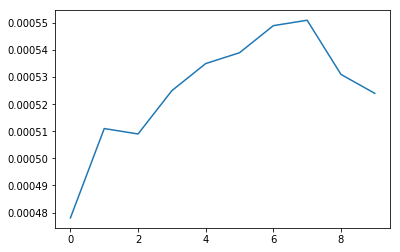

In [39]:
import matplotlib.pyplot as plt

plt.plot(y)

plt.show()

In [50]:
import numpy as np

def error_sin(A, w, p, l, x, y):
    xa = np.array(x)
    ya = np.array(y)
    yp = A * np.sin(w * xa + p) + l
    e = (yp - y) ** 2
    return np.linalg.norm(e)

t = np.arange(len(y))
yt = np.array(y) * 1000

error_sin(1, 1, 0, 0, t, yt)

2.9062329977262387

In [52]:
error_sin(1, 2, 1.6, 0, t, yt)

3.3416465987788375

In [58]:
w_best = np.array([1, 1, 0, 0])

r = 1

print(error_sin(w_best[0], w_best[1], w_best[2], w_best[3], t, yt))

for i in range(100000):
    w_test = w_best + np.random.uniform(-1, 1, 4) * r
    e_best = error_sin(w_best[0], w_best[1], w_best[2], w_best[3], t, yt)
    e_test = error_sin(w_test[0], w_test[1], w_test[2], w_test[3], t, yt)
    if e_test < e_best:
        w_best = w_test
        
print(error_sin(w_best[0], w_best[1], w_best[2], w_best[3], t, yt))

print(w_best)

2.9062329977262387
0.0004915501809910802
[ 0.26661354 -0.10578094  2.15728103  0.27608353]


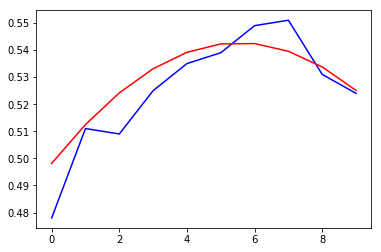

In [59]:
import matplotlib.pyplot as plt

yp = w_best[0] * np.sin(w_best[1] * t + w_best[2]) + w_best[3]
plt.plot(t, yt, color="blue")
plt.plot(t, yp, color="red")

plt.show()